In [0]:
# Load scikit's linear_model
from sklearn import linear_model

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

#Load read_excel
from pandas import read_excel

# Set random seed
np.random.seed(123)

#Load seaborn
import seaborn as sns

#Load matplotlib
import matplotlib.pyplot as plt

#Load sklearn
from sklearn.preprocessing import MinMaxScaler

#Load Dataset

In [244]:
url = "https://drive.google.com/uc?export=download&id=1cyrnQt8IF2dtdh1sToncm21i2zdVPdMd"
data = pd.read_excel(url,header=0)
print(data.dtypes)

Month               object
Q0                 float64
Q1                 float64
Q2pt5              float64
Q5                 float64
Q10                float64
Q25                float64
Q50                float64
Q75                float64
Q90                float64
Q95                float64
Q97pt5             float64
Q99                float64
Q100               float64
STNAME              object
CTYNAME             object
POPESTIMATE2015      int64
dtype: object


#Summary Statistics

In [220]:
#displaying summary statistics for the dataset
data.describe()

,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,POPESTIMATE2015
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03
mean,-0.002188,0.038799,0.053699,0.070809,0.097120,0.174372,0.351830,0.783197,1.777998,2.982530,4.716755,8.087240,39.663584,1.058292e+05
std,0.141941,0.171293,0.230851,0.304831,0.425011,0.825364,1.685318,3.355028,6.304048,8.998663,12.084223,17.355886,98.100495,3.532298e+05
min,-0.580000,-0.280000,-0.180000,-0.120000,-0.070000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000e+01
25%,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.088100e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165000,0.585000,2.575600e+04
75%,0.000000,0.030000,0.050000,0.070000,0.090000,0.140000,0.230000,0.420000,0.860000,1.583250,3.291500,8.595625,50.370000,7.043000e+04
max,2.610000,2.773600,6.000000,7.636000,10.530000,17.709999,32.000000,50.889999,74.743997,97.989998,122.191002,191.830002,2209.040039,1.012325e+07


The minimum and maximum values of percentiles have a very wide range as can be seen here. The minimum value is 0 and the maximum value goes up to 2209. 

#Check for Missing Data

In [221]:
#checking for null values in the dataset
data.isnull().sum()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
Month              2500 non-null object
Q0                 2500 non-null float64
Q1                 2500 non-null float64
Q2pt5              2500 non-null float64
Q5                 2500 non-null float64
Q10                2500 non-null float64
Q25                2500 non-null float64
Q50                2500 non-null float64
Q75                2500 non-null float64
Q90                2500 non-null float64
Q95                2500 non-null float64
Q97pt5             2500 non-null float64
Q99                2500 non-null float64
Q100               2500 non-null float64
STNAME             2500 non-null object
CTYNAME            2500 non-null object
POPESTIMATE2015    2500 non-null int64
dtypes: float64(13), int64(1), object(3)
memory usage: 332.1+ KB
None


There are no missing values in the dataset.

#Handling outliers

In [0]:
#fetching all numeric values from the dataset
percentile = data._get_numeric_data()
#converting the values to 0 if percentiles are negative
percentile[percentile<0] = 0

It does not make sense to have negative values for brightness. This could be due to issues with the satellites sensors or background noise. Hence we are converting the values to zero.

#Box Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


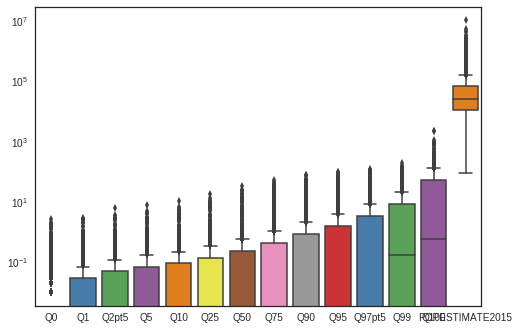

In [223]:
box_plot =sns.boxplot(data = data, orient='V',palette = "Set1" , linewidth = 1.5)
box_plot.set_yscale('log')

The interquartile range gradually increases for the percentiles, this indicates a growing variability. Q100 especially has very high variability ( [39, 2290] with standard deviation of 98) The data is not symmetric and hence not normal.

#Correlation plot

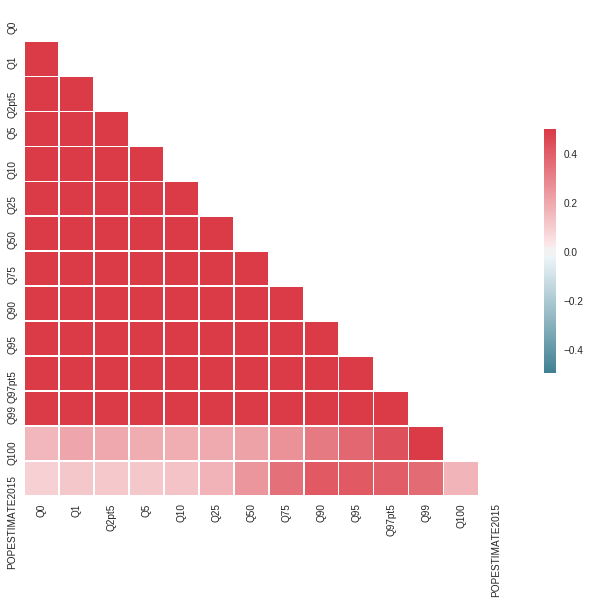

In [224]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

There seems to be a mild correlation between population estimate and brightness lying between 75 to 99th percentile. However, Q100 seems to be weakly correlated with POPESTIMATE. 

#Histograms

     Q0    Q1  Q2pt5    Q5   Q10   Q25   Q50   Q75   Q90    Q95    Q97pt5  \
0  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.000   0.00000   
1  0.02  0.08   0.09  0.11  0.13  0.18  0.30  0.72  1.89  4.110  10.37625   
2  0.10  0.15   0.16  0.18  0.20  0.23  0.30  0.46  0.82  1.363   3.11650   
3  0.00  0.03   0.04  0.05  0.07  0.12  0.21  0.47  0.92  1.500   2.93425   
4  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.000   0.00000   

       Q99        Q100  POPESTIMATE2015  
0   0.0000    0.000000            72498  
1  18.9790   95.500000            58847  
2   7.0808   42.669998            21186  
3   8.3137  203.500000             6815  
4   0.0000    0.000000             9227  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ad0ec8b00>,
      dtype=object)

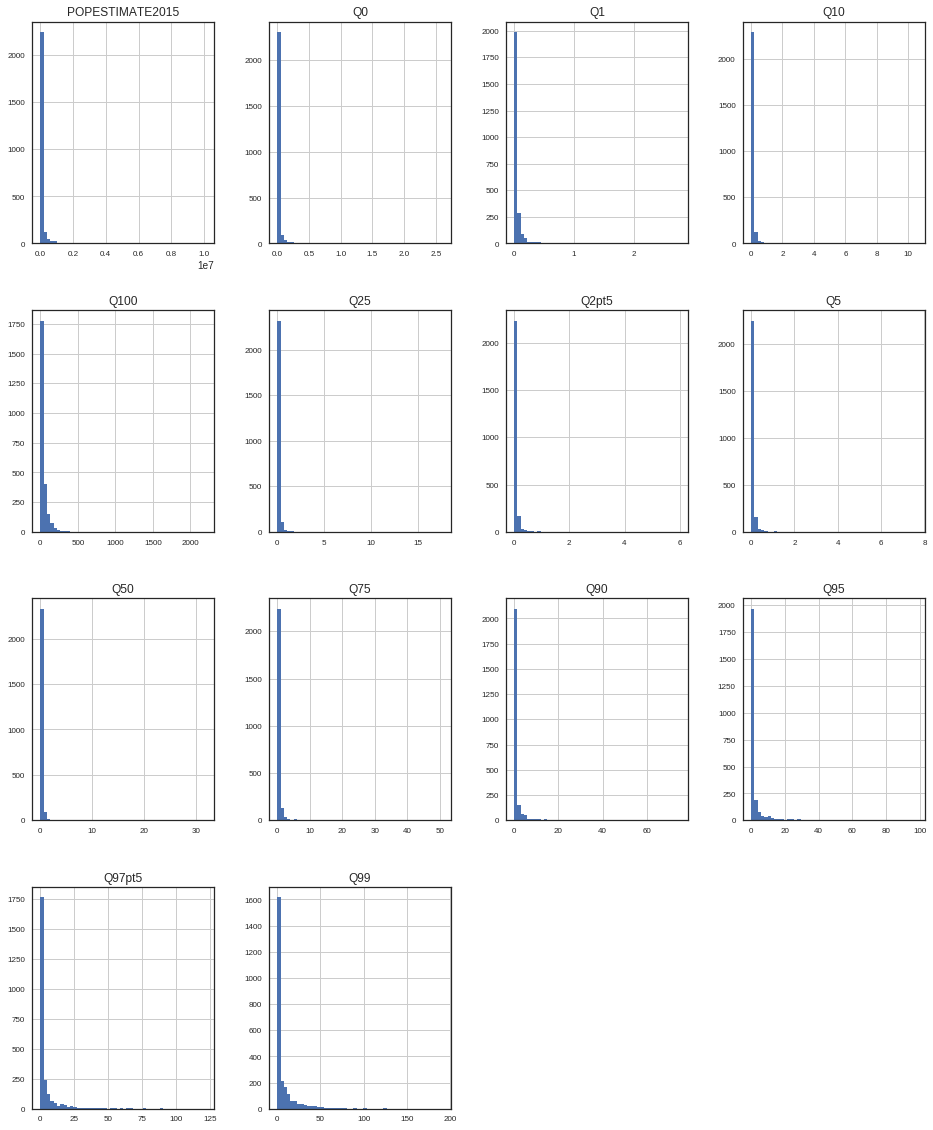

In [225]:
df_num = data.select_dtypes(include = ['float64','int64'])
print(df_num.head())
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

#Heat Map

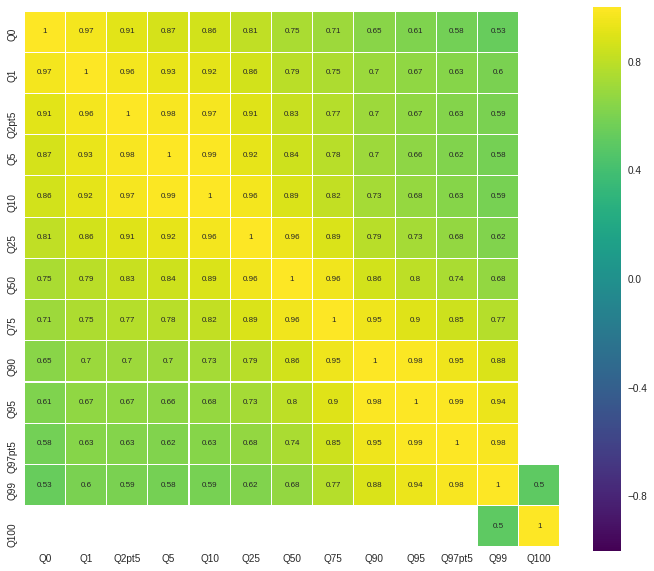

In [226]:
corr = df_num.drop('POPESTIMATE2015', axis=1).corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

#Scatter plot

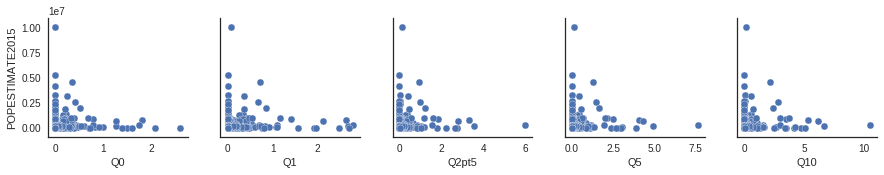

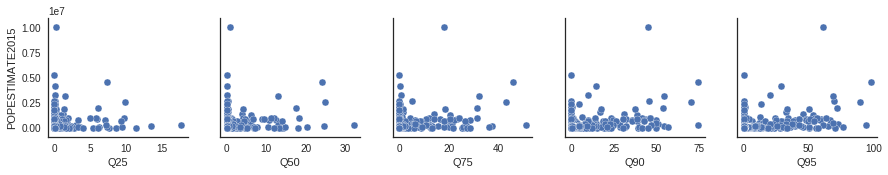

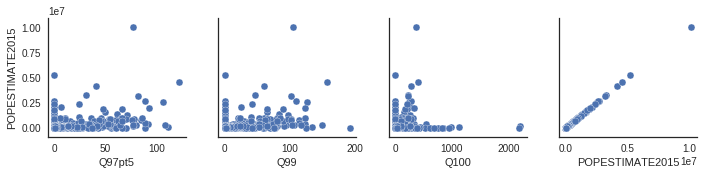

In [227]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,x_vars=df_num.columns[i:i+5],y_vars=['POPESTIMATE2015'])

#Scaling the dataset

In [228]:
#subsetting dataset to retrive the percentile columns
data_scaled = data.iloc[:,1:14]
#initializing minmaxscaler instance
scaler = MinMaxScaler()
#fitting and transforming the scaler on the scaled data
scaled_data = scaler.fit_transform(data_scaled)
#creating a dataframe of scaled data
scaled_data= pd.DataFrame(scaled_data, index = data_scaled.index , columns = data_scaled.columns)
print(scaled_data.head())

         Q0        Q1     Q2pt5        Q5       Q10       Q25       Q50  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.007663  0.028843  0.015000  0.014405  0.012346  0.010164  0.009375   
2  0.038314  0.054081  0.026667  0.023573  0.018993  0.012987  0.009375   
3  0.000000  0.010816  0.006667  0.006548  0.006648  0.006776  0.006562   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

        Q75       Q90       Q95    Q97pt5       Q99      Q100  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.014148  0.025286  0.041943  0.084918  0.098937  0.043231  
2  0.009039  0.010971  0.013910  0.025505  0.036912  0.019316  
3  0.009236  0.012309  0.015308  0.024014  0.043339  0.092121  
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  


The percentiles in the dataset have a very wide range. To ensure that features with high values aren't weighted more by the algorithms, we are scaling the attributes. It also enables easier interpretation of results.
The Min-Max scaling approach has been used here to bring values between 0 and 1. 

In [0]:
#Storing the target variable - POPESTIMATE2015 in a dataframe
target = pd.DataFrame(data.POPESTIMATE2015, index = data.index )

In [230]:
data_new = pd.DataFrame()

#appending popestimate to the scaled dataset
data_new = scaled_data
data_new['POPESTIMATE2015'] = target

data_new

,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,POPESTIMATE2015
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72498
1,0.007663,0.028843,0.015000,0.014405,0.012346,0.010164,0.009375,0.014148,0.025286,0.041943,0.084918,0.098937,0.043231,58847
2,0.038314,0.054081,0.026667,0.023573,0.018993,0.012987,0.009375,0.009039,0.010971,0.013910,0.025505,0.036912,0.019316,21186
3,0.000000,0.010816,0.006667,0.006548,0.006648,0.006776,0.006562,0.009236,0.012309,0.015308,0.024014,0.043339,0.092121,6815
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9227
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10671
6,0.011494,0.032449,0.016667,0.015715,0.012346,0.009599,0.007812,0.008646,0.011238,0.017043,0.035518,0.069913,0.200979,48170
7,0.000000,0.000000,0.000000,0.007858,0.013295,0.017504,0.019375,0.025349,0.046291,0.083580,0.121449,0.153746,0.032000,67607
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42562
9,0.164751,0.252380,0.141667,0.150602,0.152896,0.173348,0.194219,0.388043,0.661123,0.680171,0.652309,0.490320,0.067513,239665


#PCA

[0.81544705 0.10912171 0.03584632 0.02152074 0.00913169 0.00419428]


Text(0, 0.5, 'cumulative explained variance')

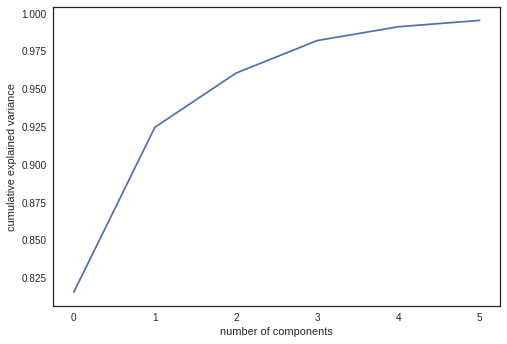

In [231]:
#loading PCA from sklearn
from sklearn.decomposition import PCA
#Defining a PCA instance with 6 components
pca = PCA(n_components=6)
#fitting PCA on the scaled dataset
principalComponents = pca.fit_transform(scaled_data.iloc[:,0:13])
#storing the principal components in a DataFrame
principalDf = pd.DataFrame(data = principalComponents)

#Amount of variance explained
print(pca.explained_variance_ratio_)

#ploting cumulative variance explained vs number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

The first 4 components explain 98.1% of the variance in the dataset. Thus we can reduce the dimensionality of the dataset and make predicitions with just the first 4 principle components. 

#Creating a dataframe with the chosen principal components

In [232]:
pc_data = principalDf.iloc[:,0:4] #selecting four principal components
pc_data['POPESTIMATE2015'] = data.POPESTIMATE2015 # appending population estimate


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#Cross Validation

In [0]:
#identifying the split points to split the dataframe
def split_dataframe(data, folds) :
    splitPoints = list(map( lambda x: int(x*len(data)/folds), (list(range(1,folds)))))     
    splits = list(np.split(data.sample(frac=1), splitPoints)) # storing the split points in the dataframe
    return splits
#generating the training and test sets
def train_test_set(splits, index) :
    test = splits[index] # generating test set based on indices
    left = splits[:index] # first half of training set
    right = splits[index+1:] #second half of training set
    train = pd.concat(left+right) #concatenating the two datasets
    return train, test

In [0]:
from sklearn.metrics import mean_absolute_error

#initializing variables
test_mape = list()
train_mape = list()
test_mae = list()
train_mae = list()
train_MAE = list()
test_MAE = list()
train_MAPE = list()
test_MAPE = list()
metrics = []

#initializing a dataframe
metric_table = pd.DataFrame(columns=['Train MAE(sd)','Test MAE(sd)','Train MAPE(sd)','Test MAPE(sd)','Model'])

#function to make predictions on the dataset
def predict(model,test_dataset,test_y_values,train_dataset,train_y_values,model_name):
  test_predictions = model.predict(test_dataset) # predictions on test set
  train_predictions = model.predict(train_dataset) # predictions on training set
  test_mape,test_mae = compute_metrics(test_y_values,test_predictions) # calling compute metrics to gather mae and mape
  train_mape,train_mae = compute_metrics(train_y_values,train_predictions)
  return train_mae,test_mae,train_mape,test_mape 

#compute the MAPE and MAE
def compute_metrics(actual_values,data_predictions):
  mape = list()
  mae = list()
  #mape 
  mape.append(mean_absolute_percentage_error(actual_values,data_predictions)) 
  #mae
  mae.append(mean_absolute_error(actual_values,data_predictions))
  return mape,mae
  
#computing the standard deviation of metrics
def compute_sd_of_metrics(train_mae,test_mae,train_mape,test_mape,model_name):
  train_mae_sd = np.std(train_mae) # computing the standard deviation
  train_mape_sd = np.std(train_mape)
  test_mae_sd = np.std(test_mae)
  test_mape_sd = np.std(test_mape)
  metrics.append(pd.Series([train_mae_sd, test_mae_sd, train_mape_sd, test_mape_sd,model_name])) # appending values to a list
  return metrics
  
#10 fold cross validation
def cross_validation(model,model_name):
  folds = 10
  splits = split_dataframe(pc_data, folds) # invoking split_dataframe to fetch split points
  train_test_data = [] 
  #generating the train and test sets based on the splits
  for i in range(0,folds) :
    train_test_data.append(train_test_set(splits, i))

  #running the model for the 10 different folds  
  for i in range(0,folds):
    train = train_test_data[i][1] #accessing training set
    test = train_test_data[i][0] # accessing test set
    train_X = train.iloc[:,0:4] # fetching features - training set
    train_Y = train.POPESTIMATE2015 # fetching target - training set
    test_X = test.iloc[:,0:4] # fetching features - test set
    test_Y = test.POPESTIMATE2015 # fetching target - test set
    model.fit(train_X, train_Y) # fitting the model
    train_mae,test_mae,train_mape,test_mape = predict(model,test_X,test_Y, train_X , train_Y, model_name) # invoking predict function to make predictions
    #appending values to the variables
    train_MAE.append(train_mae) 
    test_MAE.append(test_mae)
    train_MAPE.append(train_mape)
    test_MAPE.append(test_mape)
  metrics = pd.DataFrame(compute_sd_of_metrics(train_MAE,test_MAE,train_MAPE,test_MAPE,model_name)) # computing sd of metrics
  metric_summary = pd.DataFrame(metrics.values,columns= metric_table.columns) # generating the summary table
  print(metric_summary.head())
    


#Mean Absolute Percentage Error

In [0]:
# Function to compute the mean absolute percentage error
def mean_absolute_percentage_error(actual, predicted): 
    return np.mean(np.abs((actual - predicted) / actual)) * 100

#Linear Regression

In [236]:
#importing the necessary libraries
from sklearn import linear_model

#Creating Linear Regression model
model = linear_model.LinearRegression()
cross_validation(model,'Linear Regression')



  Train MAE(sd) Test MAE(sd) Train MAPE(sd) Test MAPE(sd)              Model
0       38771.8      31324.1        386.353       323.759  Linear Regression


#Random Forest

In [237]:
# Load scikit's random forest regressor library
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
cross_validation(model,'Random Forest')


  Train MAE(sd) Test MAE(sd) Train MAPE(sd) Test MAPE(sd)              Model
0       38771.8      31324.1        386.353       323.759  Linear Regression
1       35835.2      24899.8        428.878       395.093      Random Forest


#GBM

In [238]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
model = GradientBoostingRegressor()
cross_validation(model,"GBM")

  Train MAE(sd) Test MAE(sd) Train MAPE(sd) Test MAPE(sd)              Model
0       38771.8      31324.1        386.353       323.759  Linear Regression
1       35835.2      24899.8        428.878       395.093      Random Forest
2       35941.8      21841.6         375.01       390.652                GBM


#Worst Predicted Counties

In [239]:
#train test split
#Generating a 70 - 30 split
data_Y_train = data.POPESTIMATE2015[:-750]
data_Y_test = data.POPESTIMATE2015[-750:]

data_X_train = data_scaled[:-750]
data_X_test = data_scaled[-750:]

#linear regression
regr = linear_model.LinearRegression()
#fitting data to the model
regr.fit(data_X_train, data_Y_train)
#generating predictions
predictions = regr.predict(data_X_test)

#finding AE to identify the 50 worst predicted counties
ae = abs(predictions - data_Y_test)
worst_predicted_counties = data  
worst_predicted_counties['AE'] =  ae
#higher value of AE indicates bad predictions
worst_counties = worst_predicted_counties.nlargest(50,'AE') 
worst_counties.CTYNAME 


1980                     Cook
1889                    Kings
1997                   Queens
2413                    Wayne
1920                 New York
1996                    Bronx
2310                   Orange
1902                 Cuyahoga
2057                 Hennepin
2034                   Fresno
2416                     Pima
1868              Westchester
1937                Milwaukee
2242                Fairfield
1760                   Bergen
2450                   DuPage
2429                  Tarrant
2341                     Kern
2027                   Macomb
1793                   Pierce
2001                Middlesex
2362                Worcester
2031               Montgomery
2432              Norton city
2464                   DeKalb
1877                  Clayton
2214                  Norfolk
1887            San Francisco
2205                Culberson
2366                   Denver
2003    Colonial Heights city
1814                  El Paso
2458               Salem city
1767      

#Box Plots for counties in CA, TX and FL

##Linear regression 

In [0]:
def linear_regression(data_train,data_test):
  #generating train test set 
  data_Y_train = data_train.POPESTIMATE2015
  data_Y_test = data_test.POPESTIMATE2015

  data_X_train = data_train.iloc[:,1:14]
  data_X_test = data_test.iloc[:,1:14]
  
  regr = linear_model.LinearRegression()
  regr.fit(data_X_train, data_Y_train)
  
  predictions = regr.predict(data_X_test)
  ae,ape = compute_metrics(data_Y_test,predictions)
  
  data_test['AE'] = ae
  data_test['APE'] = ape
  
  return data_test

##Compute performance metrics

In [0]:
#computing mae and mape
def compute_metrics(data_Y_test,predictions):
  ae = abs(data_Y_test - predictions)
  ape = (abs(data_Y_test - predictions)/data_Y_test)*100
  return ae,ape

##Generate Box Plots

In [0]:
#generating box plots for the counties in the 3 states
def box_plot(Counties):
  for i in range(3):
    box_plot = pd.DataFrame()
    box_plot['AE'] = Counties[i]['AE'] 
    box_plot['APE'] = Counties[i]['APE']

    fig, axs = plt.subplots(ncols=3)
    box_plot =sns.boxplot(data = box_plot, orient='V',palette = "Set1" , linewidth = 1.5,ax=axs[i],showfliers= False)
    box_plot.set_yscale('log')

##Predictions on California, Texas and Florida

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


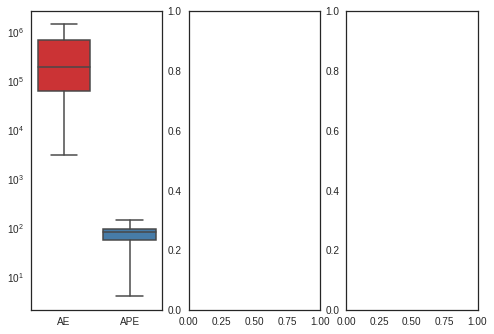

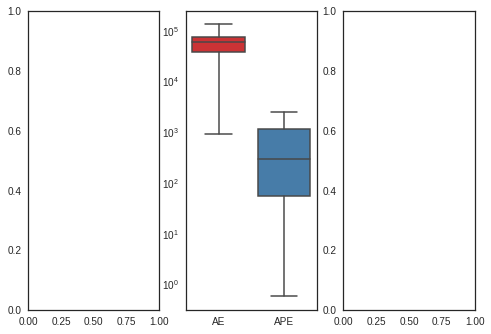

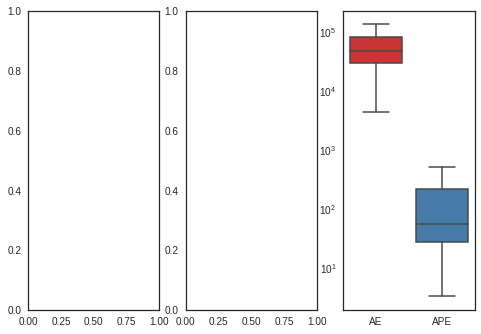

In [243]:
data_test =  data[(data.STNAME == 'California') | (data.STNAME == 'Texas')  | (data.STNAME == 'Florida') ] # fetching CA, TX and FL and using it as test set
data_train =  data[(data.STNAME != 'California') & (data.STNAME != 'Texas')  & (data.STNAME != 'Florida') ] # fetching all states except CA,TX and FL to be used as training set

#invoking linear regression model
data_test = linear_regression(data_train,data_test)

#state list

#dataframes for each state
california = data_test[(data_test.STNAME == 'California')]
texas = data_test[(data_test.STNAME == 'Texas')]
florida = data_test[(data_test.STNAME == 'Florida')]

state_list =[california,texas,florida]

#plotting box plots for each state
box_plot(state_list)

MAE is high for California
MAPE is high for Texas

Texas has population varying from 119 to 4551362. Given that AE is small for counties in Texas, the high variance in APE can be explained by the wide population range. This resonates with the APE box plot for Texas.

The AE indicates how big an error we can expect on the forecasted predictions. As is evident from the box plots, California has the maximum AE. This is because 76.8% of the counties have no NTL data captured. Texas on the other hand has brightness values for all counties and as expected a small value for AE. 